In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline

import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [9]:
df_navent = pd.read_csv('data/train.csv', dtype={'tipodepropiedad':'category', 'ciudad':'category', 'provincia':'category', 'id':'int32', 'antiguedad':'float16', 'habitaciones':'float16', 'garages':'float16', 'banos':'float16', 'metroscubiertos':'float16', 'metrostotales':'float16', 'idzona':'float16', 'lat':'float16', 'lng':'float16', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'}, parse_dates=['fecha'])

## Cloropleth de ciudades

Arranque haciendo con geopandas pero el gráfico no se hacía asi que para el gráfico cambié a basemap 

Los shapefiles se obtienen de: https://esoc.princeton.edu/file-type/gis-data#Mexico (Municipalidades)

In [3]:
fp = 'data/shp/Mexican_Municipalities/Mexican Municipalities.shp'
df_map = gpd.read_file(fp)[['NOM_MUN','geometry']].to_crs('+proj=robin')
df_map = df_map.rename(columns={'NOM_MUN': 'ciudad'})

In [4]:
df_map.head()

,ciudad,geometry
0,Tlalpan,POLYGON ((-9215889.724437028 2064426.635349321...
1,Xochimilco,POLYGON ((-9211408.535305906 2054553.856774347...
2,La Magdalena Contreras,POLYGON ((-9220773.891009877 2061624.955241656...
3,Azcapotzalco,POLYGON ((-9209090.556132214 2085864.636927485...
4,Benito Jurez,POLYGON ((-9210091.704231462 2070291.536902894...


In [5]:
df_map_ciudad = df_map[['ciudad']].copy()

In [6]:
df_map_ciudad.head(2)

,ciudad
0,Tlalpan
1,Xochimilco


In [7]:
#saco tildes para matchear con shapefile
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"á", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"é", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"í", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ó", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ú", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ñ", "")

In [8]:
idx1 = pd.Index(df_navent.ciudad)
idx2 = pd.Index(df_map_ciudad.ciudad)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan, 'Alamo Temapache', 'Alvaro Obregn', 'AnAhuac',
       'ApetatitlAn de Antonio Carvajal', 'Atoyac de Alvarez', 'Bacalar',
       'Cancn', 'Chetumal', 'Chilapa de Alvarez', 'CopAndaro',
       'Juchitn de Zaragoza', 'Pachuca', 'Playa del Carmen', 'PolotitlAn',
       'PuruAndiro', 'TacAmbaro', 'TlaltizapAn de Zapata',
       'Villa de Alvarez', 'Villahermosa', 'Yauhquemecan',
       'Zimatln de Alvarez', 'ZirAndaro', 'catln', 'catln de Jurez',
       'caxochitln', 'cmbaro', 'otra', 'utln de Navarro', 'yotln'],
      dtype=object)

### Respecto de esto hay algunas ciudades que como no tener tildes hubo que examinar cuales si estaban en el shapefile que da la forma del mapa

Con str contains y startwith se vio cuales estaban, a continuación la idea del código comentado para no molestar la ejecución:

In [9]:
#map_df['2'] = map_df.loc[map_df["ciudad"].str.startswith('') &
#                                       map_df['ciudad'].str.contains('') &
#                                       map_df['ciudad'].str.contains(''),:] 

In [10]:
#map_df['2'].dropna()

### No descubiertos y que concluyo que no están en el shapefile:
Villahermosa -
<br>
Cancn -
<br>
Juchitn de Zaragoza -
<br>
Playa del Carmen -
<br>
Chetumal -
<br>
Bacalar -
<br>
Otra - Es otra, no es una ciudad
<br>
### Descubiertos:
Alamo Temapache - Alamos (SHP)
<br>
Alvaro Obregn - lvaro Obregn (SHP)
<br>
AnAhuac - Anhuac (SHP)
<br>
ApetatitlAn de Antonio Carvajal - Apetatitln de Antonio Carvajal (SHP)
<br>
Atoyac de Alvarez - Atoyac de lvarez (SHP)
<br>
Chilapa de Alvarez - Chilapa de lvarez (SHP)
<br>
CopAndaro - Copndaro (SHP)
<br>
Pachuca - Pachuca de Soto (SHP)
<br>
PolotitlAn - Polotitln (SHP)
<br>
PuruAndiro - Purundiro (SHP)
<br>
TacAmbaro - Tacmbaro (SHP)
<br>
TlaltizapAn de Zapata - Tlaltizapn (SHP)
<br>
Villa de Alvarez - Villa de lvarez (SHP)
<br>
Yauhquemecan - Yauhquemehcan (SHP)
<br>
Zimatln de Alvarez - Zimatln de lvarez (SHP)
<br>
ZirAndaro - Zirndaro (SHP)
<br>
catln - Acatln (SHP)
<br>
catln de Jurez - Acatln de Jurez (SHP)
<br>
caxochitln - Acaxochitln (SHP)
<br>
cmbaro - Acmbaro (SHP)
<br>
utln de Navarro - Autln de Navarro (SHP)
<br>
yotln - Ayotln (SHP)

In [11]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alamo Temapache": "Alamos"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alvaro Obregn": "lvaro Obregn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"AnAhuac": "Anhuac"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ApetatitlAn de Antonio Carvajal": "Apetatitln de Antonio Carvajal"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Atoyac de Alvarez": "Atoyac de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Chilapa de Alvarez": "Chilapa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"CopAndaro": "Copndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Pachuca": "Pachuca de Soto"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PolotitlAn": "Polotitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PuruAndiro": "Purundiro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TlaltizapAn de Zapata": "Tlaltizapn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Villa de Alvarez": "Villa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Yauhquemecan": "Yauhquemehcan"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Zimatln de Alvarez": "Zimatln de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ZirAndaro": "Zirndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"catln de Jurez": "Acatln de Jurez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"caxochitln": "Acaxochitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"utln de Navarro": "Autln de Navarro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"yotln": "Ayotln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"cmbaro": "Acmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TacAmbaro": "Tacmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({'catln':'Acatln'})

In [12]:
df_navent_ciudad = df_navent[['id','ciudad']].copy()

In [13]:
df_navent_ciudad = df_navent_ciudad.groupby('ciudad').agg(np.size).sort_values(by="id",ascending=False).rename(columns={'id': 'cantidad'}).reset_index()

In [14]:
df_navent_ciudad.head()

,ciudad,cantidad
0,Quertaro,12646
1,Benito Jurez,11014
2,Zapopan,10360
3,San Luis Potos,7925
4,Mrida,7162


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


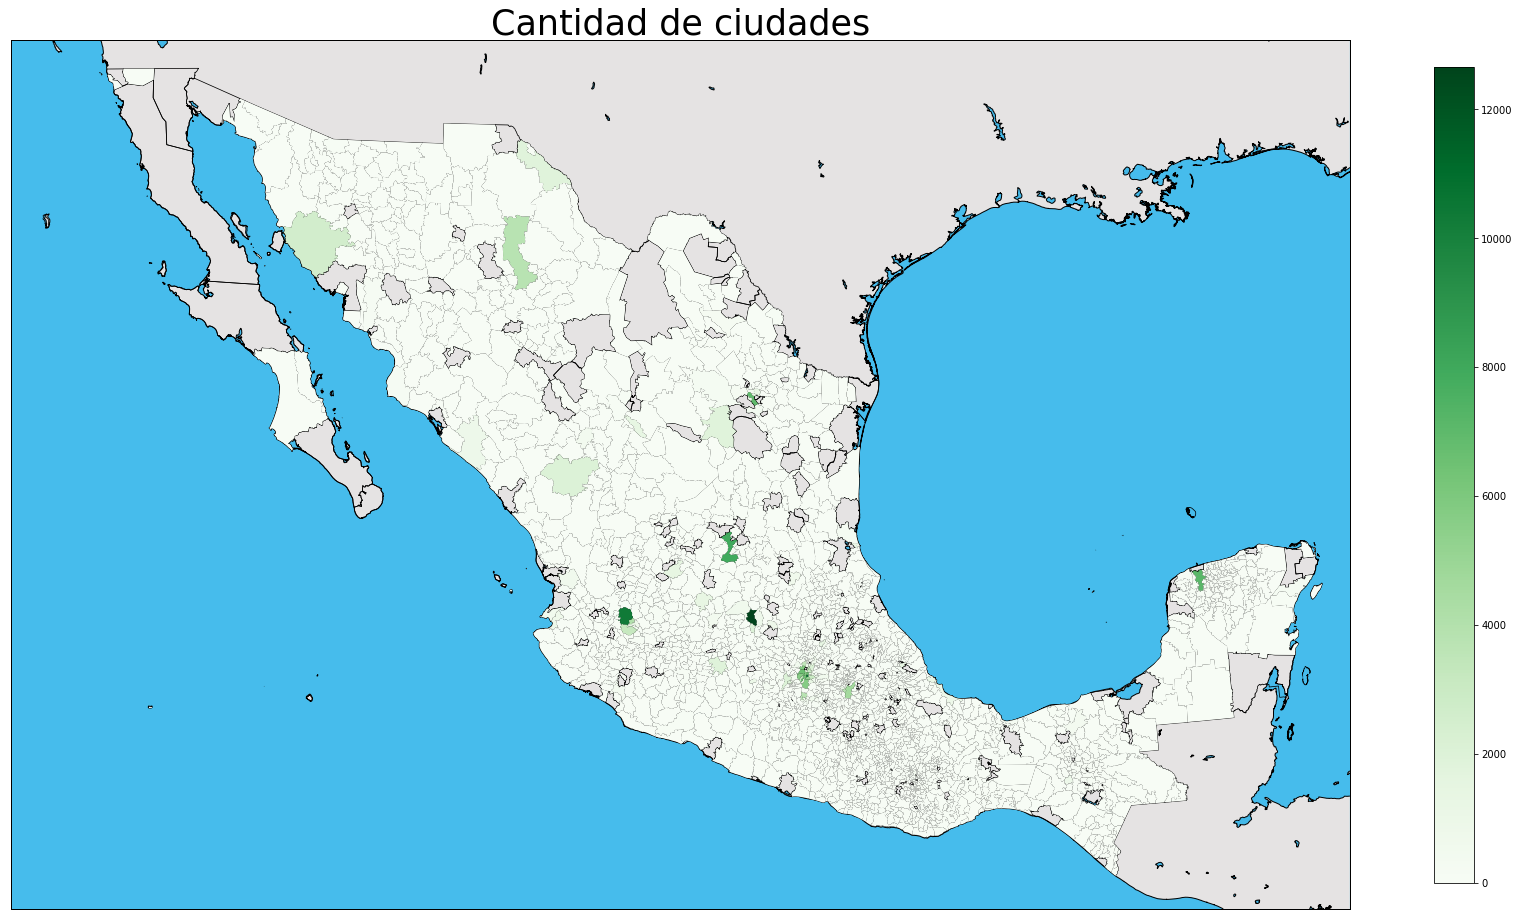

In [15]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_Municipalities/Mexican Municipalities','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'ciudad': [ciudad['NOM_MUN'] for ciudad in mexicoMap.shapefile_info]
    })

merge_ciudad_and_map = df_map_shp.merge(df_navent_ciudad, on='ciudad', how='left')
merge_ciudad_and_map = merge_ciudad_and_map.drop_duplicates('ciudad')


#fig configuration
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(merge_ciudad_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_ciudad_and_map['cantidad'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_ciudad_and_map['cantidad'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Cantidad de ciudades",fontsize=35)
plt.show()

## Precio vs cantidad de habitaciones

Hasta 5 habitaciones

[]

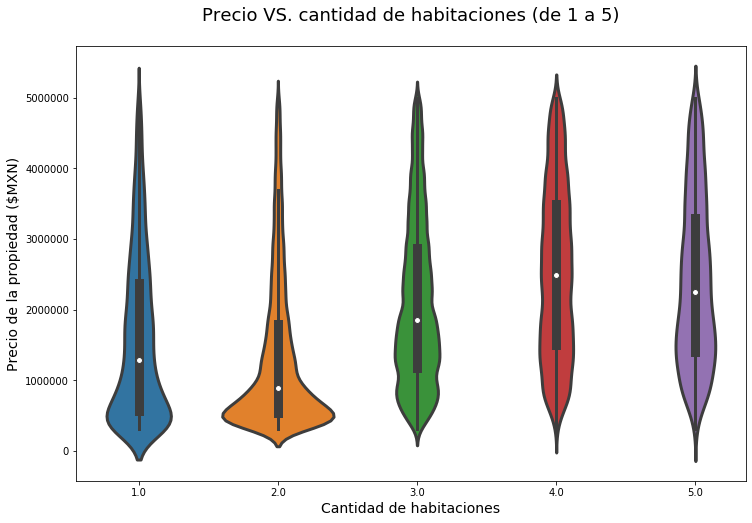

In [76]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 0)&(df_navent['habitaciones'] <= 5) \
               &(df_navent['precio'] < 5000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio VS. cantidad de habitaciones (de 1 a 5)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
plt.plot()

De 5 a 10 habitaciones

[]

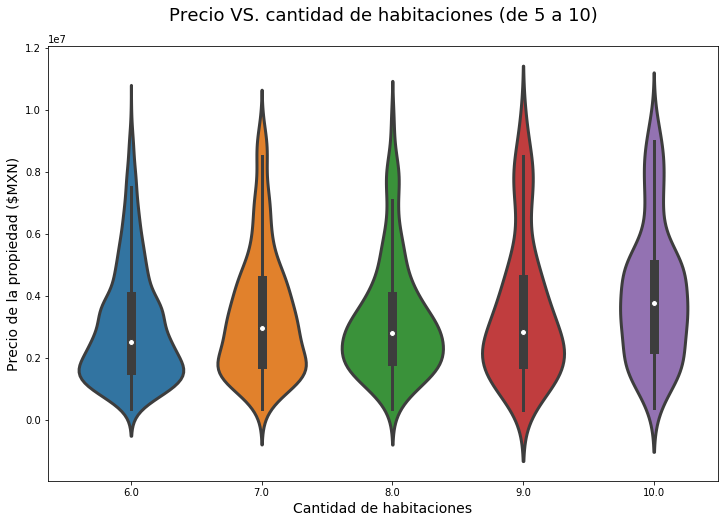

In [77]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 5)&(df_navent['habitaciones'] <= 10) \
               &(df_navent['precio'] < 10000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio VS. cantidad de habitaciones (de 5 a 10)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
plt.plot()

## Precio vs cantidad de garages

[]

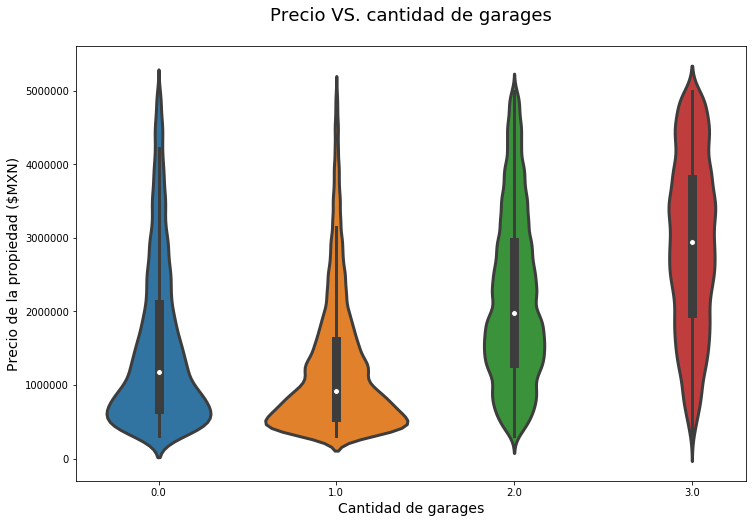

In [78]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['garages', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='garages', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio VS. cantidad de garages",fontsize=18, pad=25)
plt.xlabel("Cantidad de garages",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
plt.plot()

## Precio vs cantidad de baños

[]

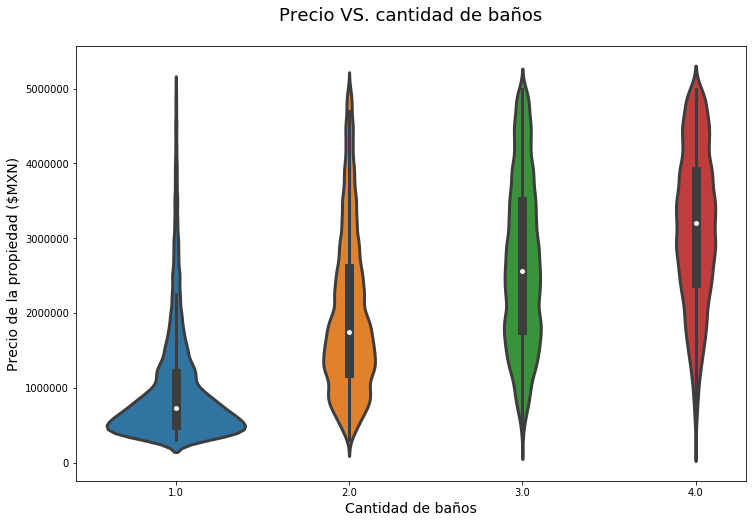

In [79]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['banos', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='banos', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio VS. cantidad de baños",fontsize=18, pad=25)
plt.xlabel("Cantidad de baños",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
plt.plot()